In [1]:
#importing libraries
import matplotlib as pl
from matplotlib import pyplot as plt
import numpy as np

In [2]:
class Node:
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0
        
    def __eq__(self, other):
        return self.position == other.position

def return_path(current_node,maze):
    path = []
    no_rows, no_columns = np.shape(maze)
    result = maze
    current = current_node
    while current is not None:
        path.append(current.position)
        current = current.parent
    path = path[::-1]
    for i in range(len(path)):
        result[path[i][0]][path[i][1]] = 2
    return result


def search(maze, cost, start, end):
    start_node = Node(None, tuple(start))
    end_node = Node(None, tuple(end))
    
    open_list = []  
    closed_list = [] 
    
    open_list.append(start_node)
    
    outer_iterations = 0
    max_iterations = (len(maze) // 2) ** 10

    move  =   [[-1, 0 ], # go up
              [ 0, -1], # go left
              [ 1, 0 ], # go down
              [ 0, 1 ]] # go right

    no_rows, no_columns = np.shape(maze)
    
    while len(open_list) > 0:
        
        outer_iterations += 1    
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index
        # stop condition       
        if outer_iterations > max_iterations:
            print ("giving up on pathfinding too many iterations")
            return return_path(current_node,maze)

        open_list.pop(current_index)
        closed_list.append(current_node)
        
        if current_node == end_node:
            return return_path(current_node,maze)

        children = []
        for new_position in move: 

            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])
            #make sure within range of the maze
            if (node_position[0] > (no_rows - 1) or 
                node_position[0] < 0 or 
                node_position[1] > (no_columns -1) or 
                node_position[1] < 0):
                continue

            #make sure the node is walkable
            if maze[node_position[0]][node_position[1]] != 0:
                continue
            new_node = Node(current_node, node_position)
            children.append(new_node)

        for child in children:
            if len([closed_child for closed_child in closed_list if closed_child == child]) > 0:
                continue
                
            child.g = current_node.g + cost
            #heuristic using eucledian distance
            child.h = (((child.position[0] - end_node.position[0]) ** 2) + 
                       ((child.position[1] - end_node.position[1]) ** 2)) 

            child.f = child.g + child.h
            
            if len([i for i in open_list if child == i and child.g > i.g]) > 0:
                continue
            
            open_list.append(child)

In [3]:
#initializing the maze 
maze = np.zeros((100,100))
#setting the obstacles in the maze
maze[80:,:20]=1
maze[:80,40:60]=1
maze[60:,70:80]=1

In [4]:
print(maze)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


In [5]:
#initializing the start point and goal point
start=[1,1]
goal=[95,95]
cost=10

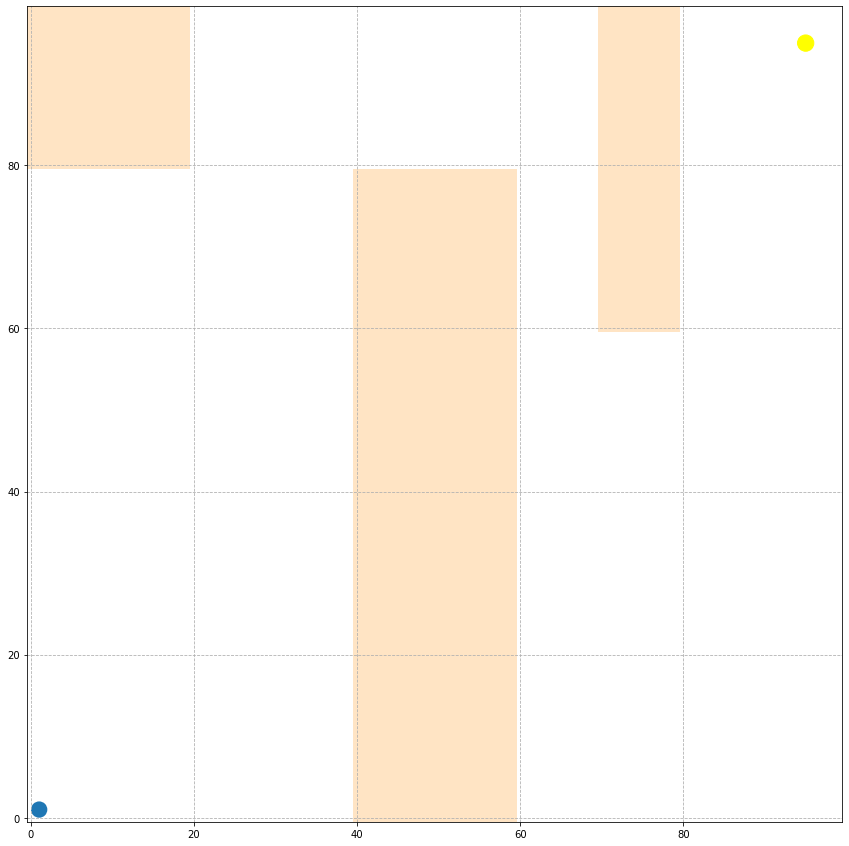

In [6]:
cmap = pl.colors.ListedColormap(['white','bisque'])

plt.figure(figsize=(15,15))

ax = plt.gca()
ax.cla()
start_circle = plt.Circle((start),1)
ax.add_artist(start_circle)
goal_circle = plt.Circle((goal),1,color = 'yellow')
ax.add_artist(goal_circle)

plt.imshow(maze,cmap=cmap,origin='lower')
plt.grid(linestyle='--')
plt.show()

In [7]:
path = search(maze,cost,start,goal)

print(path)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 2. 2. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


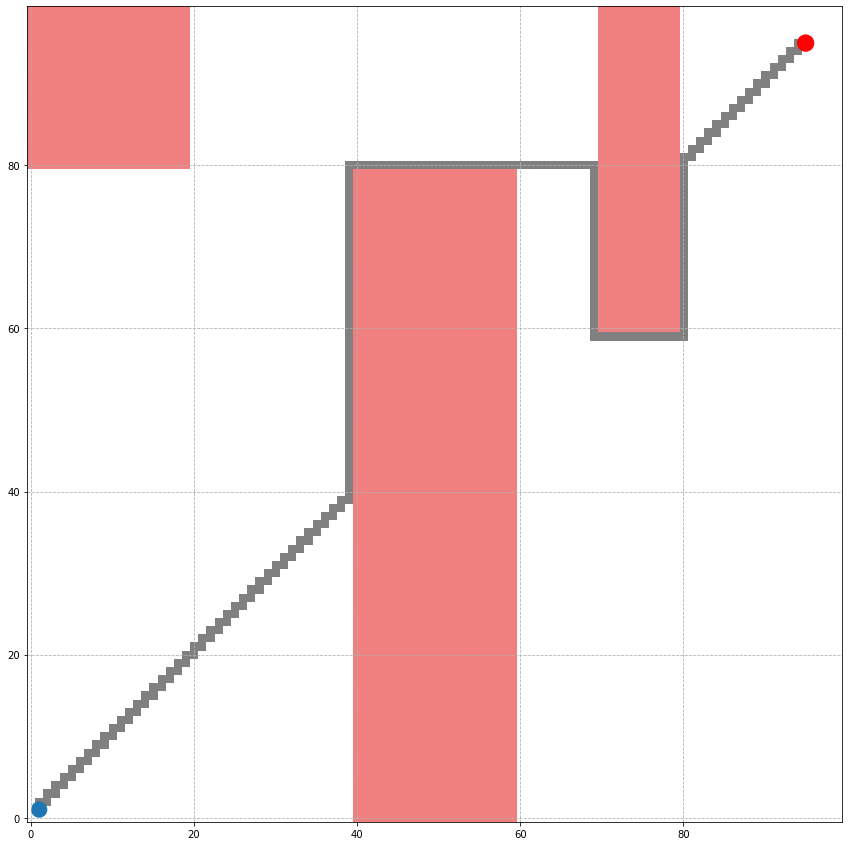

In [8]:
cmap = pl.colors.ListedColormap(['white','lightcoral','gray'])

plt.figure(figsize=(15,15))

ax = plt.gca()
ax.cla()
start_circle = plt.Circle((start),1)
ax.add_artist(start_circle)
goal_circle = plt.Circle((goal),1,color = 'red')
ax.add_artist(goal_circle)

plt.imshow(path,cmap=cmap,origin='lower')
plt.grid(linestyle='--')
plt.show()